# BMO case study--loan prediction

By Dequan Er, Ph.D.  
Created 10:30 AM 2020/02/23

## Problem Statement

The assignment is to investigate and analyze the attached data, producing a model that can be
used to predict whether a loan will be paid in full or charged off (this occurs when the loan is
unpaid or delinquent for a period of time so the financial institution determines that the debt is
unlikely to be collected). You will use the loan_status column in the dataset for the outcome,
and you can use the remaining variables in the dataset to predict the loan status (although
beware of variables that may contain data leakage).

### 1. Import libraries

In [273]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from scipy import stats

### 2. Load Data

In [274]:
df = pd.read_csv('BMO_MLCoE_CaseStudy/BMO_MLCoE_CaseStudy_Dataset.csv')

/anaconda3/envs/DL/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Find the target label, it is a classification problem that use the dataset with many features to predict the loan status. 

In [275]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [276]:
df.shape

(42538, 144)

In [277]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,...,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,0.0,42535.000000,42506.000000,42506.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.000000,160.000000,160.000000
mean,NaN,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04,NaN,13.373043,0.152449,1.081424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4270.794250,49.889875,1.262500
std,NaN,7410.938391,7146.914675,7131.598014,208.927216,6.409635e+04,NaN,6.726315,0.512406,1.527455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3119.543917,15.569143,4.142869
min,NaN,500.000000,500.000000,0.000000,15.670000,1.896000e+03,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.290000,10.690000,0.000000
25%,NaN,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,NaN,8.200000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1842.750000,40.000000,0.000000
50%,NaN,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,NaN,13.470000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3499.350000,49.970000,0.000000
75%,NaN,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,NaN,18.680000,0.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5701.100000,60.652500,0.000000
max,NaN,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,NaN,29.990000,13.000000,33.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14798.200000,92.740000,24.000000


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 144 entries, id to settlement_term
dtypes: float64(115), object(29)
memory usage: 46.7+ MB


Drop id, member_id, url,sec_app_open_acc

## 3. Preprocessing Data
### 3.1 dealing with missing data

In [279]:
total = df.isna().sum().sort_values(ascending=False)
percent = (df.isna().sum())/df.isna().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(20)

,Total,Percent
inq_fi,42538,1.0
hardship_type,42538,1.0
member_id,42538,1.0
url,42538,1.0
mths_since_last_major_derog,42538,1.0
annual_inc_joint,42538,1.0
dti_joint,42538,1.0
hardship_last_payment_amount,42538,1.0
hardship_payoff_balance_amount,42538,1.0
orig_projected_additional_accrued_interest,42538,1.0


First drop target data with nan. There are more than 20 columns that contain invalid information. Then these columns should be droped out. Let's drop features that has more than 4000 which is 90.6% of data are missing or NaN.

In [280]:
drop_cols = missing_data[missing_data.Total>4000]
df = df.drop(drop_cols.index, axis = 1)

These are dropped columns that have more than 4000 invalid entries. 

In [281]:
drop_cols.index, drop_cols.shape

(Index(['inq_fi', 'hardship_type', 'member_id', 'url',
        'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
        'hardship_last_payment_amount', 'hardship_payoff_balance_amount',
        'orig_projected_additional_accrued_interest', 'hardship_loan_status',
        'hardship_dpd', 'hardship_length', 'payment_plan_start_date',
        'hardship_end_date', 'hardship_start_date', 'hardship_amount',
        'deferral_term', 'hardship_status', 'hardship_reason',
        'verification_status_joint', 'open_il_24m', 'sec_app_earliest_cr_line',
        'mths_since_rcnt_il', 'sec_app_collections_12_mths_ex_med',
        'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts',
        'sec_app_open_act_il', 'sec_app_revol_util', 'sec_app_open_acc',
        'sec_app_mort_acc', 'num_tl_op_past_12m', 'sec_app_inq_last_6mths',
        'revol_bal_joint', 'total_il_high_credit_limit', 'total_bc_limit',
        'total_bal_ex_mort', 'tot_hi_cred_lim', 'tot_coll_amt', 'tot_cur_bal

Eliminated 92 columns with more than 4000 entries of NaN. Also,for time sake, let's drop NaN at this moment. A more refined method of filling can be done by fillna() using different methods.  

In [282]:
df = df.dropna()

In [283]:
df.shape

(38433, 52)

Let's clean these data with mean of the column.

In [284]:
cat_features =  df.select_dtypes(include=['object'])
cat_features.head()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,debt_settlement_flag
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,...,309xx,GA,Apr-99,9.40%,f,Apr-13,Oct-16,Individual,N,N
3,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,...,917xx,CA,Feb-96,21%,f,Jan-15,Apr-16,Individual,N,N
4,60 months,12.69%,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Fully Paid,...,972xx,OR,Jan-96,53.90%,f,Jan-17,Apr-18,Individual,N,N
5,36 months,7.90%,A,A4,Veolia Transportaton,3 years,RENT,Source Verified,Dec-11,Fully Paid,...,852xx,AZ,Nov-04,28.30%,f,Jan-15,Feb-17,Individual,N,N
6,60 months,15.96%,C,C5,Southern Star Photography,8 years,RENT,Not Verified,Dec-11,Fully Paid,...,280xx,NC,Jul-05,85.60%,f,May-16,Dec-18,Individual,N,N


apparently some category features are mixed and need to be convert to numerical features. 

In [285]:
df['term'] = df['term'].apply(lambda x: float(str(x).split()[0]))
df['int_rate'] = df['int_rate'].apply(lambda x: float(str(x)[:-1])/100.0)
df['revol_util'] = df['int_rate'].apply(lambda x: float(str(x)[:-1])/100.0)


In [286]:
cat_features =  df.select_dtypes(include=['object'])
cat_features.head()

,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,debt_settlement_flag
1,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,Apr-99,f,Apr-13,Oct-16,Individual,N,N
3,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,Feb-96,f,Jan-15,Apr-16,Individual,N,N
4,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Fully Paid,n,other,Personal,972xx,OR,Jan-96,f,Jan-17,Apr-18,Individual,N,N
5,A,A4,Veolia Transportaton,3 years,RENT,Source Verified,Dec-11,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,Nov-04,f,Jan-15,Feb-17,Individual,N,N
6,C,C5,Southern Star Photography,8 years,RENT,Not Verified,Dec-11,Fully Paid,n,debt_consolidation,Loan,280xx,NC,Jul-05,f,May-16,Dec-18,Individual,N,N


Let's skip the time series at this stage. pymnt_plan, initial_list_status are n and f for all data respectively. 

In [287]:
drop_cols = ['issue_d', 'earliest_cr_line','last_pymnt_d','last_credit_pull_d',
             'emp_title','pymnt_plan','title','zip_code', 'hardship_flag']
df = df.drop(drop_cols, axis = 1)

In [288]:
y = df["loan_status"].map({"Fully Paid":0, "Charged Off":1, "Does not meet the credit policy. Status:Fully Paid" : 2 , "Does not meet the credit policy. Status:Charged Off":3})
df = df.drop(columns='loan_status')

In [289]:
df['emp_length'].replace({'< 1 year' : 1 , 
                                  '1 year' : 1 , '2 years' : 2 , '3 years' : 3 , 
                                  '4 years' : 4 , '5 years' : 5 ,'6 years' : 6 , '7 years' : 7 ,
                                  '8 years' : 8 , '9 years' : 9 ,'10 years' : 10 , '10+ years' : 10 ,
                         } , inplace = True)

In [290]:
cat_features =  df.select_dtypes(include=['object'])
cat_features.head()

,grade,sub_grade,home_ownership,verification_status,purpose,addr_state,initial_list_status,application_type,debt_settlement_flag
1,C,C4,RENT,Source Verified,car,GA,f,Individual,N
3,C,C1,RENT,Source Verified,other,CA,f,Individual,N
4,B,B5,RENT,Source Verified,other,OR,f,Individual,N
5,A,A4,RENT,Source Verified,wedding,AZ,f,Individual,N
6,C,C5,RENT,Not Verified,debt_consolidation,NC,f,Individual,N


In [291]:
categorical_features_one_hot = pd.get_dummies(cat_features)

Convert categorical features to one_hot feature

In [292]:
numerical_features =  df.select_dtypes(exclude=['object'])
numerical_features.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,2500.0,2500.0,2500.0,60.0,0.1527,59.83,1,30000.0,1.00,0.0,...,122.9,1.11,119.66,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10000.0,10000.0,10000.0,36.0,0.1349,339.31,10,49200.0,20.00,0.0,...,0.0,0.00,357.48,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3000.0,3000.0,3000.0,60.0,0.1269,67.79,1,80000.0,17.94,0.0,...,0.0,0.00,67.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,5000.0,5000.0,5000.0,36.0,0.0790,156.46,3,36000.0,11.20,0.0,...,0.0,0.00,161.03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,7000.0,7000.0,7000.0,60.0,0.1596,170.08,8,47004.0,23.51,0.0,...,0.0,0.00,1313.76,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [293]:
df = pd.concat([numerical_features, categorical_features_one_hot,y], axis=1)

### 3.2 EDA

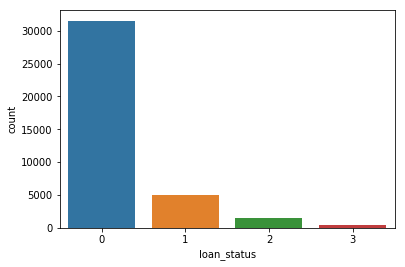

In [294]:
g = sns.countplot(x="loan_status",data=df)
g = plt.setp(g.get_xticklabels(), rotation=0)
# map({"Fully Paid":0, "Charged Off":1, 
# "Does not meet the credit policy. Status:Fully Paid" : 2 , 
# "Does not meet the credit policy. Status:Charged Off":3})

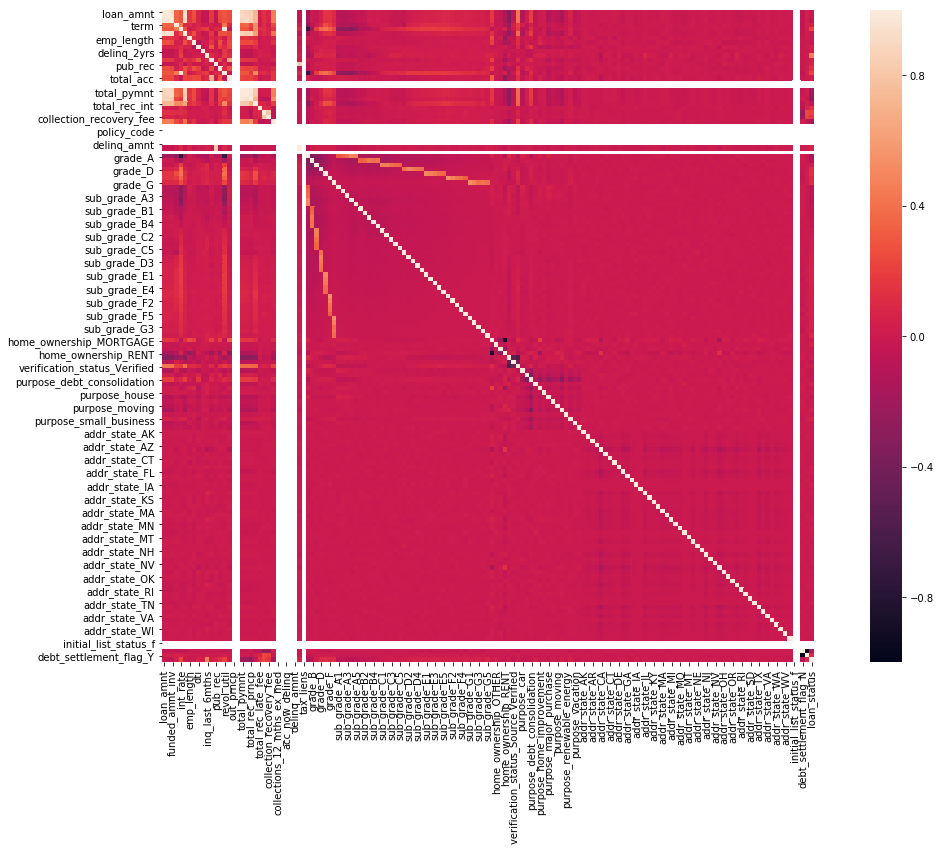

In [203]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corrmat, vmax=1.0, square=True)

In [295]:
corr = df.corr()
features = abs(corr['loan_status']).sort_values(ascending = False)
features

loan_status                    1.000000
inq_last_6mths                 0.468409
total_rec_prncp                0.261212
int_rate                       0.226608
recoveries                     0.222158
revol_util                     0.217055
total_pymnt_inv                0.216046
total_pymnt                    0.196062
grade_A                        0.168710
last_pymnt_amnt                0.163055
collection_recovery_fee        0.155569
total_rec_late_fee             0.134851
revol_bal                      0.128540
grade_E                        0.121462
grade_G                        0.114694
grade_D                        0.111546
grade_F                        0.099694
grade_B                        0.092851
debt_settlement_flag_Y         0.091207
debt_settlement_flag_N         0.091207
sub_grade_G5                   0.087034
sub_grade_A4                   0.082358
pub_rec                        0.071907
sub_grade_A3                   0.066829
sub_grade_A5                   0.065059


## 4. Modeling

Standarization of data


In [296]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score , train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

In [297]:
# for a faster test purpose, only select 10 k data
X , y = df.iloc[: , :-1] , df.iloc[: , -1]


std = StandardScaler()
X_std = std.fit_transform(X)

mms = MinMaxScaler()
X_mms = mms.fit_transform(X)

norm = Normalizer()
X_norm = norm.fit_transform(X)

/anaconda3/envs/DL/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/DL/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/envs/DL/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [298]:
lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)

In [253]:
neighbors = np.arange(1, 2)
kfold = 10
val_accuracy = { 'std' : [] , 'mms' : [] , 'norm' : [] }

bestKnr = None
bestAcc = 0.0
bestScaling = None


for i, k in enumerate(neighbors):
    # print(k,'NN is being calculated')
    knr = SVC(gamma=0.001)
    
    
    s1 = np.mean(cross_val_score(knr, X_std, y, cv=kfold))
    val_accuracy['std'].append(s1)
    
    s2 = np.mean(cross_val_score(knr, X_mms, y, cv=kfold))
    val_accuracy['mms'].append(s2)
    
    s3 = np.mean(cross_val_score(knr, X_norm, y, cv=kfold))
    val_accuracy['norm'].append(s3)
    
    if s1 > bestAcc:
        bestAcc = s1
        bestKnr = knr
        bestScaling = 'std'
        
    elif s2 > bestAcc:
        bestAcc = s2
        bestKnr = knr
        bestScaling = 'mms'
        
    elif s3 > bestAcc:
        bestAcc = s3
        bestKnr = knr
        bestScaling = 'norm'

# Plotting
plt.figure(figsize=[13,8])

plt.plot(neighbors, val_accuracy['std'], label = 'CV Accuracy with std')
plt.plot(neighbors, val_accuracy['mms'], label = 'CV Accuracy with mms')
plt.plot(neighbors, val_accuracy['norm'], label = 'CV Accuracy with norm')

plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.show()

print('Best Accuracy with feature scaling:', bestAcc)
print('Best kNN classifier:', bestKnr)
print('Best scaling:', bestScaling)

1 NN is being calculated


KeyboardInterrupt: 

In this plot, we saw that ‘norm’ standardization is the best method with nn =4.

Let us build a simple model with this conclusion at hand. Sort the importance of the features again, select the appropriate features for modeling. Here the 20 most important features are:

/anaconda3/envs/DL/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


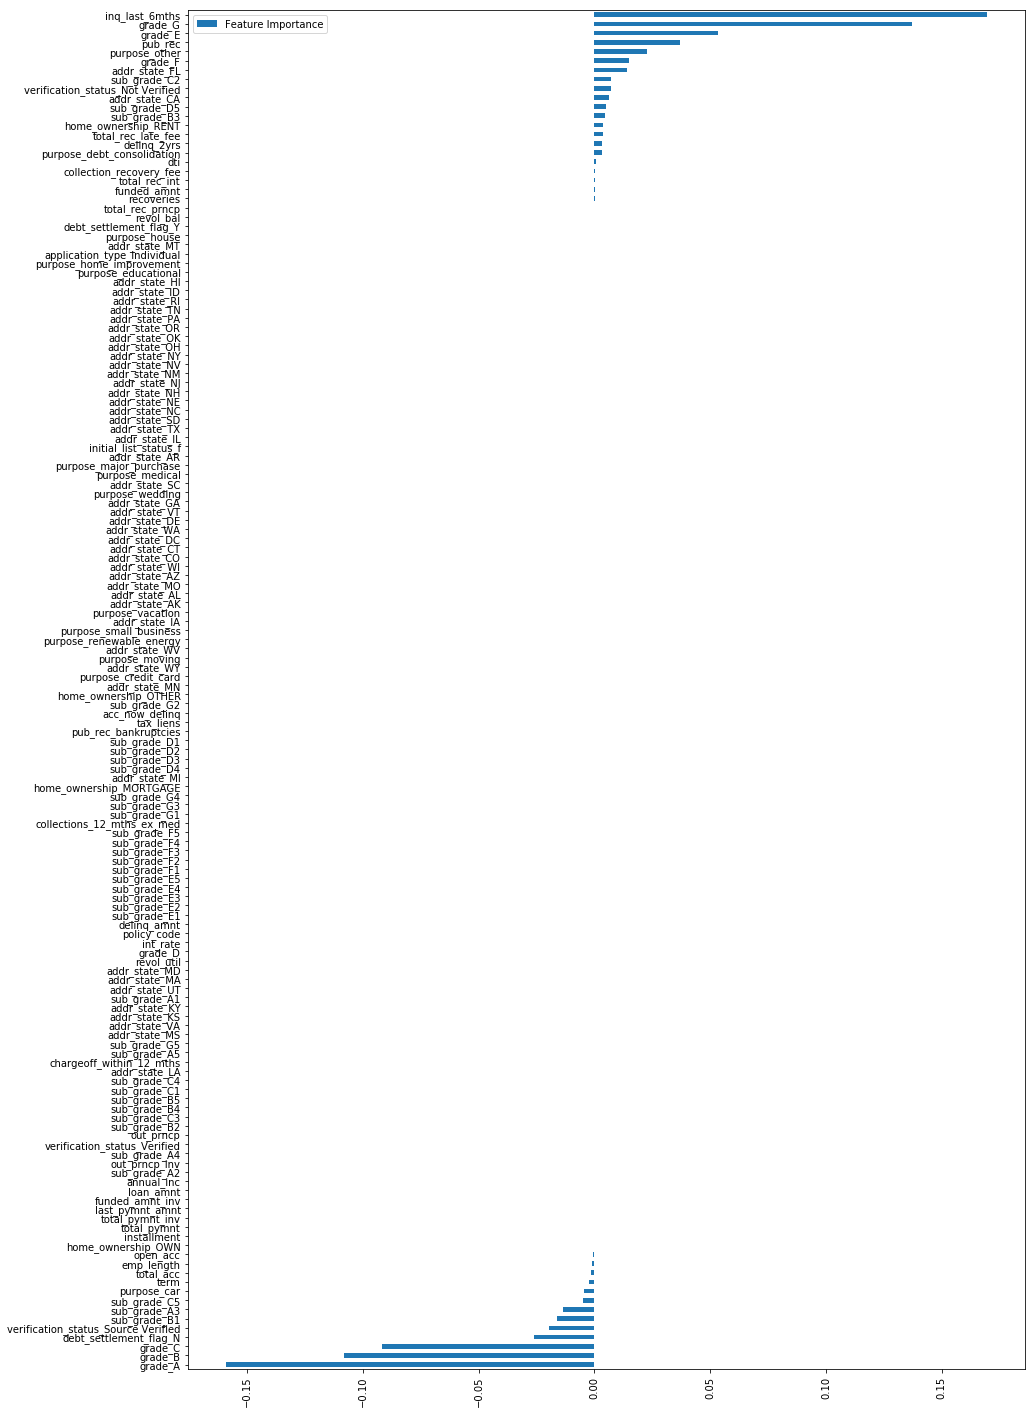

In [299]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001)
lasso.fit(X, y)

FI_lasso = pd.DataFrame({'Feature Importance' : lasso.coef_}, index = X.columns)
FI = FI_lasso.sort_values('Feature Importance',ascending = False)

FI.sort_values('Feature Importance',ascending = True).plot(kind = 'barh' , figsize = (15 , 25))
plt.xticks(rotation = 90)
plt.show()

In [300]:
FI_lasso.sort_values('Feature Importance',ascending = True)[:20]

,Feature Importance
grade_A,-1.591851e-01
grade_B,-1.083194e-01
grade_C,-9.168676e-02
debt_settlement_flag_N,-2.605401e-02
verification_status_Source Verified,-1.963018e-02
sub_grade_B1,-1.630633e-02
sub_grade_A3,-1.355052e-02
sub_grade_C5,-4.787623e-03
purpose_car,-4.586271e-03
term,-2.310930e-03


## 5. Test SVM, RandomForest, BayesianRidige models

In [301]:
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

X_train , X_test , y_train , y_test = train_test_split(X_norm , y , test_size = 0.2 , random_state = 42)

clfs = {
        'svm':svm.SVR(), 
        'RandomForestRegressor':RandomForestClassifier(n_estimators=400),
        
       }
for clf in clfs:
    try:
        clfs[clf].fit(X_train, y_train)
        y_pred = clfs[clf].predict(X_test)
        print(clf + " cost:" + str(np.sum(y_pred-y_test)/len(y_pred)) )
    except Exception as e:
        print(clf + " Error:")
        print(str(e))

/anaconda3/envs/DL/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


svm cost:-0.09882790714406743
RandomForestRegressor cost:-0.057109405489787955


Let's try the RandomForestClassifier. It is the same logic for other model optimization for the sake of time. 

In [302]:
clf = RandomForestClassifier()
#clf = linear_model.BayesianRidge()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# save the model for validating

br = clf

/anaconda3/envs/DL/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [303]:
br.n_classes_

4

In [304]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None, n_jobs = 1, 
                        train_sizes = np.linspace(.05, 1., 20), verbose = 0, plot = True):
    """
    plot learning curve.
    
    ----------
    estimator : which model 
    title : title of the table
    X : feature, type = numpy
    y : label
    ylim : tuple- (ymin, ymax)
    cv : cross-validation with default = 3
    n_jobs : parallel jobs
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"number")
        plt.ylabel(u"score")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"train—score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"cross-val—score")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff



/anaconda3/envs/DL/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


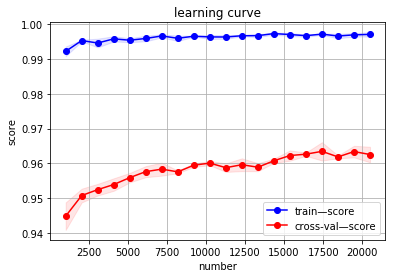

(0.9790044944024525, 0.03732874649839224)

In [305]:
plot_learning_curve(br, "learning curve", X_train, y_train)

Let's try to fine tune the model


In [308]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop=2000,num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}

In [309]:
rf_random = RandomizedSearchCV(estimator=clf, param_distributions = random_grid, n_iter=10, cv = 3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 33.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [312]:
best_random = rf_random.best_estimator_

/anaconda3/envs/DL/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


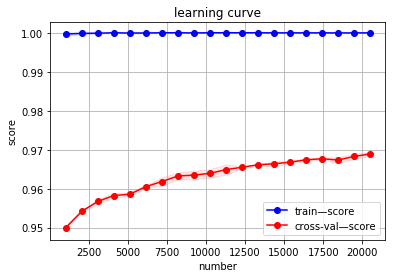

(0.9842227584784096, 0.03156795537449364)

In [313]:
plot_learning_curve(best_random, "learning curve", X_train, y_train)

## 6. Make Predictions

In [314]:
std = StandardScaler()
test_x = std.fit_transform(X_test)
pred = best_random.predict(test_x)

In [315]:
prediction = pd.DataFrame(pred , columns = ['loan_status'])
result = pd.concat([prediction] , axis = 1)
result.to_csv('prediction.csv',index=False)

In [316]:
result.loan_status.unique()

array([0, 1, 2, 3])